# Machine Learning IDATT2502 - Regression Exercises

These exercises will apply regression logic on a dataset containing observations on newborn babies.

## Linear Regression in 2 Dimensions

In this first exercise, I will be creating a linear model that predicts the weight based on length. Observations come from the length_weight.csv.

For a linear regression in 2 dimensions, the linear predictor function is utilized: `f(x) = xW + b`
where x is the input observation and W and b are model parameters.

The first thing to do in order to properly test the accuracy of the model is to split the data set. I will be splitting the data set into 80% training and 20% testing.


In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import read_csv

# Read file as dataframe
df = read_csv("length_weight.csv")

# Split dataframe into 80% training and 20% test.
train_set, test_set = train_test_split(df, test_size=0.2)

print(train_set)
# Independent variable is length
x_train = torch.tensor(train_set['# length'].values, dtype=torch.float64).reshape(-1, 1)
x_test = torch.tensor(test_set['# length'].values, dtype=torch.float64).reshape(-1, 1)

# Dependent variable is weight 
y_train = torch.tensor(train_set['weight'].values, dtype=torch.float64).reshape(-1, 1)
y_test = torch.tensor(test_set['weight'].values, dtype=torch.float64).reshape(-1, 1)

print(y_train)

print(train_set)
print(test_set)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
     # length     weight
936      45.9   2.965862
21       53.4   4.351460
364      92.7  11.360116
362      52.0   3.722240
916      91.0  13.332804
..        ...        ...
106      81.8  10.478231
674      65.6   7.881935
207      64.0   6.973716
858      84.3  12.001013
266     108.5  18.202564

[800 rows x 2 columns]
tensor([[ 2.9659],
        [ 4.3515],
        [11.3601],
        [ 3.7222],
        [13.3328],
        [11.5957],
        [12.3611],
        [14.1839],
        [ 2.6472],
     

Next, the object for the model needs to be created. The model object will have a predictor method (the linear predictor function) and a loss fuction (MSE).

In [2]:
class LinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
        self.b = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
    
    # Predictor
    def f(self, x):
        return x @ self.W + self.b
    
    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))
    
model = LinearRegressionModel()

The model parameters need to be optimized and this can be done through minimizing the loss. Specifically in this exercise, I will be using PyTorch's Stochastic Gradient Descent (SGD); however, for linear regressions, derivation of the function and finding the minimum (f'(x) = 0) would result in the global minimum.

In [3]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([model.W, model.b], 0.00001)

# Run 10000 optimization iterations.
for epoch in range(10000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.1372]], dtype=torch.float64, requires_grad=True), b = tensor([[-0.0926]], dtype=torch.float64, requires_grad=True), loss = tensor(4.9446, dtype=torch.float64, grad_fn=<MeanBackward0>)


### Visualization of model

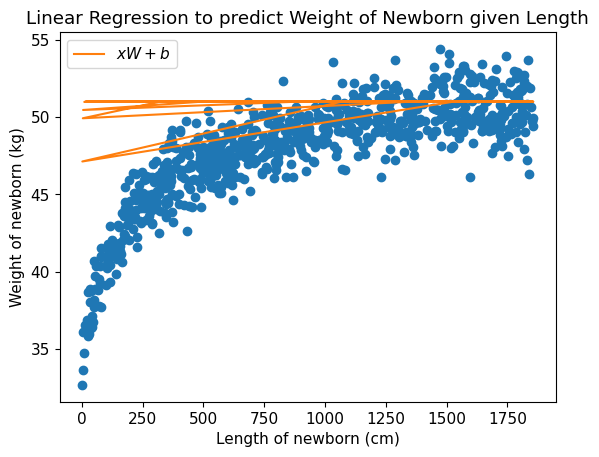

In [197]:
plt.plot(x_train, y_train, 'o')

# Line plot of model
plt.plot(x_train.detach().numpy(), model.f(x_train).detach().numpy(), label="$xW + b$")  

plt.xlabel('Length of newborn (cm)')
plt.ylabel('Weight of newborn (kg)')
plt.title('Linear Regression to predict Weight of Newborn given Length')
plt.legend()
plt.show()

### Testing accuracy of Model

Using the test data separated at the start, a final evaluation of the accuracy of the model could be determined. Here, the MAE, MSE, R-Squared, and RMSE can be calculated. Ultimately, the MAE of the model can be seen through the loss function.

## Linear Regression in 3 Dimensions

In this exercise, I will be creating a linear model that predicts the age (in days) out from the length and weight of the given observations in day_length_weight.csv.

Again, the first thing to do is get the datasets ready to be worked on. This is done by separating the dataset into training and testing, as well as separating the independent and dependent variables.

In [166]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import read_csv

# Read file as dataframe
df = read_csv("day_length_weight.csv")

# Split dataframe into 80% training and 20% test.
train_set, test_set = train_test_split(df, test_size=0.2)

# Independent variables are length and weight
length_train = torch.tensor(train_set['length'].values, dtype=torch.float64).reshape(-1, 1)
length_test = torch.tensor(test_set['length'].values, dtype=torch.float64).reshape(-1, 1)

weight_train = torch.tensor(train_set['weight'].values, dtype=torch.float64).reshape(-1, 1)
weight_test = torch.tensor(test_set['weight'].values, dtype=torch.float64).reshape(-1, 1)

indep_train = torch.cat((length_train, weight_train), dim=1)
indep_test = torch.cat((length_test, weight_test), dim=1)


# Dependent variable is age in days 
age_train = torch.tensor(train_set['# day'].values, dtype=torch.float64).reshape(-1, 1)
age_test = torch.tensor(test_set['# day'].values, dtype=torch.float64).reshape(-1, 1)

print(indep_train)

print(train_set)
print(test_set)

tensor([[ 98.4424,  16.3030],
        [ 69.3244,   6.3342],
        [ 90.8126,  10.0379],
        ...,
        [ 95.1875,  13.0730],
        [102.7233,  20.9242],
        [101.4734,  18.5292]], dtype=torch.float64)
      # day      length     weight
498  1043.0   98.442373  16.303018
438   158.0   69.324428   6.334188
461   704.0   90.812631  10.037901
905   435.0   81.866168  11.607424
457  1278.0  104.119457  14.475232
..      ...         ...        ...
31   1635.0  117.731888  16.231294
350   190.0   72.832127   8.831976
823  1177.0   95.187493  13.073035
500  1671.0  102.723331  20.924235
637  1718.0  101.473414  18.529186

[800 rows x 3 columns]
      # day      length     weight
854  1092.0   95.443047  14.018663
604   179.0   73.129798  10.802797
994  1356.0   99.463876  18.639701
366   374.0   70.471834   9.134044
490    94.0   61.569914   6.683262
..      ...         ...        ...
240  1743.0  110.085345  20.856916
298   129.0   63.321285   7.547553
731  1708.0  112.777036  1

The linear model for a problem with an extra explanatory variable is a little different.

In [167]:
class Linear3DRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0], [0.0]], dtype=torch.float64, requires_grad=True)
        self.b = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
    
    # Predictor
    def f(self, x):
        return x @ self.W + self.b
    
    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))

model = Linear3DRegressionModel()

In [168]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([model.W, model.b], 0.00001)

# Run 10000 optimization iterations.
for epoch in range(100000):
    model.loss(indep_train, age_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(indep_train, age_train)))

W = tensor([[-2.4966],
        [97.5505]], dtype=torch.float64, requires_grad=True), b = tensor([[-73.8880]], dtype=torch.float64, requires_grad=True), loss = tensor(87003.1522, dtype=torch.float64, grad_fn=<MeanBackward0>)


### Visualization of Model

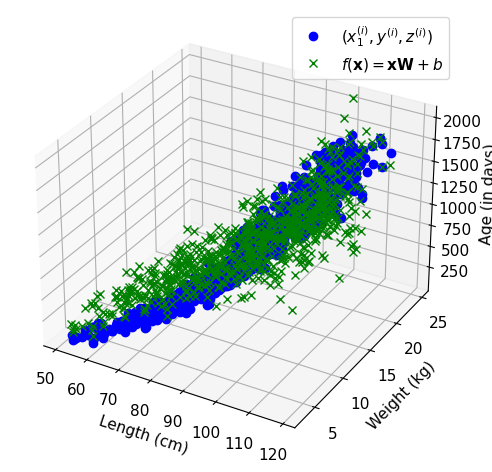

In [170]:
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, art3d
import numpy as np

matplotlib.rcParams.update({'font.size': 11})


fig = plt.figure('3D Linear Regression of Age of a Newborn based on Length and Weight')

ax = fig.add_subplot(111, projection='3d')  # 3D plots require a subplot with 3D projection enabled


ax.plot(length_train[:].squeeze(), weight_train[:].squeeze(), age_train[:].squeeze(), 'o', label='$(x_1^{(i)},y^{(i)},z^{(i)})$', color='blue')

# Plot the original points 
#ax.plot(x_train.detach().numpy(), y_train.detach().numpy(), z_train.detach().numpy(), 'o')

# Plot the model
plot1_f = ax.plot(np.array(length_train), np.array(weight_train), np.array(model.f(indep_train).detach().numpy()), 'x', color='green', label='$f(\\mathbf{x}) = \\mathbf{xW}+b$')
plot1_info = fig.text(0.01, 0.03, '')


ax.set_xlabel('Length (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Age (in days)')
plt.legend()
fig.tight_layout()
plt.show()

## Non-Linear Regression in 2 Dimensions

In this exercise, I will create a non-linear model that predicts the circumference of the head based on the age in days from the day_head_circumference.csv observations.


In [227]:
# Read file as dataframe
df = read_csv("day_head_circumference.csv")

# Split dataframe into 80% training and 20% test.
train_set, test_set = train_test_split(df, test_size=0.2)

# Independent variable is length
x_train = torch.tensor(train_set['# day'].values, dtype=torch.float64).reshape(-1, 1)
x_test = torch.tensor(test_set['# day'].values, dtype=torch.float64).reshape(-1, 1)

# Dependent variable is weight 
y_train = torch.tensor(train_set['head circumference'].values, dtype=torch.float64).reshape(-1, 1)
y_test = torch.tensor(test_set['head circumference'].values, dtype=torch.float64).reshape(-1, 1)

print(train_set)
print(test_set)

      # day  head circumference
974  1223.0           53.061994
32    708.0           50.007764
15    467.0           44.853424
127   287.0           44.662677
394  1331.0           48.771319
..      ...                 ...
218   567.0           48.355745
334   769.0           47.139588
554  1537.0           50.889847
39   1785.0           52.528219
37    977.0           48.523207

[800 rows x 2 columns]
      # day  head circumference
426  1165.0           49.509220
991  1656.0           49.678748
110  1831.0           47.201954
360   445.0           46.257714
408  1416.0           51.449169
..      ...                 ...
897   584.0           47.585065
730   527.0           49.733041
329   828.0           52.357650
155   387.0           44.916706
416    74.0           40.392219

[200 rows x 2 columns]


Since the model is non-linear, the class needs to include a different predictor function.

In [236]:
class NonLinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
        self.b = torch.tensor([[0.0]], dtype=torch.float64, requires_grad=True)
    
    def sigmoid(self, z):
        return 1/(1+np.e**(-z))
    
    # Predictor
    def f(self, x):
        return 20 * self.sigmoid(x @ self.W + self.b) + 31
   
    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))
    
model = NonLinearRegressionModel()

In [237]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([model.W, model.b], 0.000001)

# Run 10000 optimization iterations.
for epoch in range(10000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.0023]], dtype=torch.float64, requires_grad=True), b = tensor([[-0.0170]], dtype=torch.float64, requires_grad=True), loss = tensor(2.9679, dtype=torch.float64, grad_fn=<MeanBackward0>)


### Visualization of the model

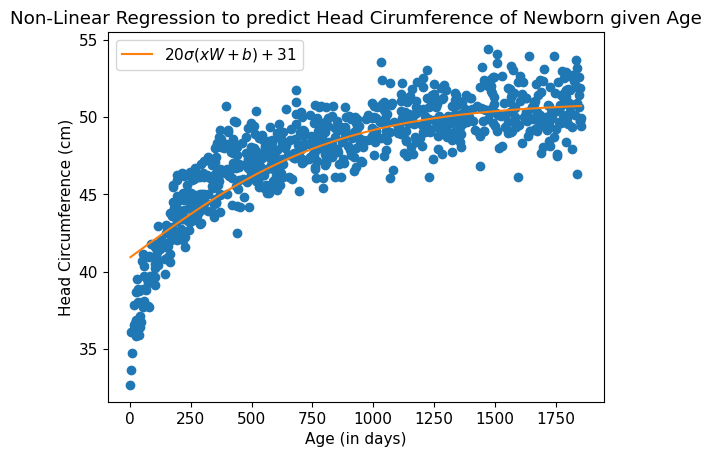

In [238]:
plt.plot(x_train, y_train, 'o')

# Line plot of model
x = torch.arange(torch.min(x_train), torch.max(x_train), 1.0, dtype=torch.float64).reshape(-1, 1)
plt.plot(x, model.f(x).detach().numpy(), label="$20σ(xW + b) + 31$")

plt.xlabel('Age (in days)')
plt.ylabel('Head Circumference (cm)')
plt.title('Non-Linear Regression to predict Head Cirumference of Newborn given Age')
plt.legend()
plt.show()